In [4]:

import pandas as pd
import pandas
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [5]:
df = pd.read_csv('Resources/uswhites.csv')
df.head()

,ID,alcohol,category,country,description,designation,price,rating,region,subregion,subsubregion,title,url,varietal,vintage,winery
0,4,14.1,White,US,This white has an expert level of intensity an...,Dutton Ranch Walker Hill Vineyard,50.0,94,California,Sonoma,Green Valley,Dutton-Goldfield 2016 Dutton Ranch Walker Hill...,https://www.winemag.com/buying-guide/dutton-go...,Chardonnay,2016,Dutton-Goldfield
1,39,12.6,White,US,"Stunning aromatics combine spicy citrus, tangy...",Maresh Vineyard Old Vine,30.0,94,Oregon,Willamette Valley,Dundee Hills,Harper Voit 2016 Maresh Vineyard Old Vine Ries...,https://www.winemag.com/buying-guide/harper-vo...,Riesling,2016,Harper Voit
2,53,13.8,White,US,"This is a structured and remarkable wine, burs...",Year of the Monkey Single Vineyard,60.0,94,California,Napa-Sonoma,Carneros,Donum 2016 Year of the Monkey Single Vineyard ...,https://www.winemag.com/buying-guide/donum-201...,Chardonnay,2016,Donum
3,56,13.8,White,US,The wine's aromas are arresting in notes of le...,Chaleur Blanc,35.0,94,Washington,Columbia Valley,Columbia Valley (WA),DeLille 2017 Chaleur Blanc White (Columbia Val...,https://www.winemag.com/buying-guide/delille-2...,Bordeaux-style White Blend,2017,DeLille
4,74,14.7,White,US,"This is a grainy, structured and textured whit...",Lewis MacGregor Estate Vineyard,65.0,94,California,Sonoma,Russian River Valley,Williams Selyem 2016 Lewis MacGregor Estate Vi...,https://www.winemag.com/buying-guide/williams-...,Chardonnay,2016,Williams Selyem


In [6]:
df = df.drop(['ID', 'category', 'country', 'description', 'designation', 'subsubregion', 'title', 'url', 'winery'], axis=1)
df.head()


,alcohol,price,rating,region,subregion,varietal,vintage
0,14.1,50.0,94,California,Sonoma,Chardonnay,2016
1,12.6,30.0,94,Oregon,Willamette Valley,Riesling,2016
2,13.8,60.0,94,California,Napa-Sonoma,Chardonnay,2016
3,13.8,35.0,94,Washington,Columbia Valley,Bordeaux-style White Blend,2017
4,14.7,65.0,94,California,Sonoma,Chardonnay,2016


In [7]:
X_df = pd.DataFrame(df)
X_df['subregion'] = X_df['subregion'].astype(str)
X_df['vintage'] = X_df['vintage'].astype(int)

In [8]:
X = X_df.drop("price", axis=1)
y = df["price"]

In [9]:
X= X.apply(LabelEncoder().fit_transform)
X

,alcohol,rating,region,subregion,varietal,vintage
0,130,14,2,42,17,22
1,68,14,17,56,87,22
2,118,14,2,28,17,22
3,118,14,24,7,10,23
4,152,14,2,42,17,22
...,...,...,...,...,...,...
23653,147,11,2,3,17,11
23654,147,12,2,3,17,11
23655,159,12,2,3,17,11
23656,176,12,2,42,138,10


In [10]:
X = X.values.astype("float32")
print(X)
y = y.values.astype("float32")
print(y)

[[130.  14.   2.  42.  17.  22.]
 [ 68.  14.  17.  56.  87.  22.]
 [118.  14.   2.  28.  17.  22.]
 ...
 [159.  12.   2.   3.  17.  11.]
 [176.  12.   2.  42. 138.  10.]
 [139.  12.   2.   2.  17.  11.]]
[50. 30. 60. ... 29. 24. 55.]


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42)
print(y_test.shape)
print(X_test.shape)

(5915,)
(5915, 6)


In [12]:
scaler_model = StandardScaler()

In [13]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [14]:
X_scaler = scaler_model.fit(X_train)

In [15]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
input_dims = X_train.shape[1]
input_dims

6

In [17]:
model = Sequential()
model.add(Dense(12, activation = 'relu', name='dense_1', kernel_initializer='random_uniform', input_dim=(input_dims)))
model.add(Dense(8, activation='relu', name='dense_2', kernel_initializer='random_uniform'))
model.add(Dense(1, activation='linear', name='predictions'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                84        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
predictions (Dense)          (None, 1)                 9         
Total params: 197
Trainable params: 197
Non-trainable params: 0
_________________________________________________________________


In [18]:
import numpy as np

In [19]:
from numpy import sqrt,asarray
model.compile(optimizer='adam', loss='mse', metrics=['mse','mae'])
history = model.fit(X_train_scaled, y_train, epochs=1000, batch_size=10,  verbose=1, validation_split=0.2)


Train on 14194 samples, validate on 3549 samples
Epoch 1/1000
14194/14194 [==============================] - 1s 103us/step - loss: 255.6637 - mse: 255.6637 - mae: 11.5369 - val_loss: 94.4804 - val_mse: 94.4804 - val_mae: 7.0632
Epoch 2/1000
14194/14194 [==============================] - 1s 83us/step - loss: 98.2828 - mse: 98.2828 - mae: 6.9865 - val_loss: 92.2160 - val_mse: 92.2160 - val_mae: 6.9784
Epoch 3/1000
14194/14194 [==============================] - 1s 82us/step - loss: 96.7563 - mse: 96.7563 - mae: 6.9225 - val_loss: 90.1130 - val_mse: 90.1130 - val_mae: 6.8525
Epoch 4/1000
14194/14194 [==============================] - 1s 72us/step - loss: 95.2794 - mse: 95.2794 - mae: 6.8570 - val_loss: 89.6469 - val_mse: 89.6469 - val_mae: 6.8583
Epoch 5/1000
14194/14194 [==============================] - 1s 75us/step - loss: 94.1586 - mse: 94.1586 - mae: 6.8120 - val_loss: 88.2307 - val_mse: 88.2307 - val_mae: 6.7853
Epoch 6/1000
14194/14194 [==============================] - 1s 74us/step

14194/14194 [==============================] - 2s 134us/step - loss: 88.1325 - mse: 88.1325 - mae: 6.5169 - val_loss: 83.8000 - val_mse: 83.8000 - val_mae: 6.4886
Epoch 48/1000
14194/14194 [==============================] - 2s 136us/step - loss: 88.1374 - mse: 88.1374 - mae: 6.5171 - val_loss: 83.6552 - val_mse: 83.6552 - val_mae: 6.5002
Epoch 49/1000
14194/14194 [==============================] - 2s 135us/step - loss: 88.0521 - mse: 88.0521 - mae: 6.5131 - val_loss: 83.7166 - val_mse: 83.7166 - val_mae: 6.5546
Epoch 50/1000
14194/14194 [==============================] - 2s 139us/step - loss: 88.0235 - mse: 88.0236 - mae: 6.5187 - val_loss: 83.8065 - val_mse: 83.8065 - val_mae: 6.5473
Epoch 51/1000
14194/14194 [==============================] - 2s 131us/step - loss: 87.9378 - mse: 87.9378 - mae: 6.5098 - val_loss: 83.8996 - val_mse: 83.8996 - val_mae: 6.4904
Epoch 52/1000
14194/14194 [==============================] - 2s 132us/step - loss: 87.8428 - mse: 87.8429 - mae: 6.5051 - val_los

14194/14194 [==============================] - 2s 133us/step - loss: 87.2149 - mse: 87.2149 - mae: 6.4865 - val_loss: 82.4551 - val_mse: 82.4551 - val_mae: 6.4866
Epoch 94/1000
14194/14194 [==============================] - 2s 142us/step - loss: 87.2681 - mse: 87.2682 - mae: 6.4868 - val_loss: 82.8813 - val_mse: 82.8813 - val_mae: 6.5934
Epoch 95/1000
14194/14194 [==============================] - 2s 138us/step - loss: 87.1815 - mse: 87.1815 - mae: 6.4883 - val_loss: 82.4294 - val_mse: 82.4294 - val_mae: 6.5053
Epoch 96/1000
14194/14194 [==============================] - 2s 136us/step - loss: 87.0840 - mse: 87.0840 - mae: 6.4832 - val_loss: 82.4998 - val_mse: 82.4998 - val_mae: 6.4946
Epoch 97/1000
14194/14194 [==============================] - 2s 136us/step - loss: 87.0071 - mse: 87.0071 - mae: 6.4818 - val_loss: 82.9042 - val_mse: 82.9042 - val_mae: 6.4617
Epoch 98/1000
14194/14194 [==============================] - 2s 137us/step - loss: 87.0804 - mse: 87.0804 - mae: 6.4810 - val_los

14194/14194 [==============================] - 3s 178us/step - loss: 86.5947 - mse: 86.5947 - mae: 6.4542 - val_loss: 82.0992 - val_mse: 82.0992 - val_mae: 6.5068
Epoch 140/1000
14194/14194 [==============================] - 3s 177us/step - loss: 86.5894 - mse: 86.5894 - mae: 6.4576 - val_loss: 82.1853 - val_mse: 82.1853 - val_mae: 6.4977
Epoch 141/1000
14194/14194 [==============================] - 2s 175us/step - loss: 86.5813 - mse: 86.5813 - mae: 6.4537 - val_loss: 82.3440 - val_mse: 82.3440 - val_mae: 6.4038
Epoch 142/1000
14194/14194 [==============================] - 3s 178us/step - loss: 86.5201 - mse: 86.5201 - mae: 6.4487 - val_loss: 83.6968 - val_mse: 83.6968 - val_mae: 6.6702
Epoch 143/1000
14194/14194 [==============================] - 2s 170us/step - loss: 86.5192 - mse: 86.5191 - mae: 6.4490 - val_loss: 82.6009 - val_mse: 82.6009 - val_mae: 6.6185
Epoch 144/1000
14194/14194 [==============================] - 2s 170us/step - loss: 86.4520 - mse: 86.4520 - mae: 6.4533 - va

14194/14194 [==============================] - 2s 171us/step - loss: 86.2854 - mse: 86.2855 - mae: 6.4466 - val_loss: 81.8834 - val_mse: 81.8834 - val_mae: 6.4874
Epoch 186/1000
14194/14194 [==============================] - 2s 162us/step - loss: 86.3091 - mse: 86.3091 - mae: 6.4439 - val_loss: 81.8986 - val_mse: 81.8986 - val_mae: 6.4552
Epoch 187/1000
14194/14194 [==============================] - 2s 167us/step - loss: 86.3255 - mse: 86.3256 - mae: 6.4459 - val_loss: 81.7394 - val_mse: 81.7394 - val_mae: 6.4414
Epoch 188/1000
14194/14194 [==============================] - 2s 167us/step - loss: 86.2921 - mse: 86.2921 - mae: 6.4421 - val_loss: 82.1534 - val_mse: 82.1534 - val_mae: 6.4288
Epoch 189/1000
14194/14194 [==============================] - 2s 171us/step - loss: 86.3570 - mse: 86.3571 - mae: 6.4461 - val_loss: 82.6101 - val_mse: 82.6101 - val_mae: 6.4420
Epoch 190/1000
14194/14194 [==============================] - 3s 178us/step - loss: 86.2874 - mse: 86.2874 - mae: 6.4358 - va

14194/14194 [==============================] - 2s 169us/step - loss: 86.1207 - mse: 86.1208 - mae: 6.4299 - val_loss: 81.6916 - val_mse: 81.6916 - val_mae: 6.4580
Epoch 232/1000
14194/14194 [==============================] - 2s 171us/step - loss: 86.1394 - mse: 86.1395 - mae: 6.4444 - val_loss: 82.2281 - val_mse: 82.2281 - val_mae: 6.4149
Epoch 233/1000
14194/14194 [==============================] - 2s 173us/step - loss: 86.0961 - mse: 86.0961 - mae: 6.4335 - val_loss: 82.1767 - val_mse: 82.1767 - val_mae: 6.5685
Epoch 234/1000
14194/14194 [==============================] - 2s 167us/step - loss: 86.1714 - mse: 86.1714 - mae: 6.4488 - val_loss: 81.7746 - val_mse: 81.7746 - val_mae: 6.4473
Epoch 235/1000
14194/14194 [==============================] - 2s 159us/step - loss: 86.1446 - mse: 86.1446 - mae: 6.4292 - val_loss: 82.3341 - val_mse: 82.3341 - val_mae: 6.5750
Epoch 236/1000
14194/14194 [==============================] - 2s 153us/step - loss: 86.2003 - mse: 86.2002 - mae: 6.4455 - va

14194/14194 [==============================] - 2s 170us/step - loss: 86.1380 - mse: 86.1380 - mae: 6.4361 - val_loss: 81.9160 - val_mse: 81.9160 - val_mae: 6.4532
Epoch 278/1000
14194/14194 [==============================] - 3s 177us/step - loss: 86.1258 - mse: 86.1258 - mae: 6.4425 - val_loss: 82.5046 - val_mse: 82.5046 - val_mae: 6.5847
Epoch 279/1000
14194/14194 [==============================] - 3s 188us/step - loss: 86.1646 - mse: 86.1646 - mae: 6.4416 - val_loss: 81.7724 - val_mse: 81.7724 - val_mae: 6.4072
Epoch 280/1000
14194/14194 [==============================] - 2s 170us/step - loss: 86.1568 - mse: 86.1568 - mae: 6.4314 - val_loss: 81.7381 - val_mse: 81.7381 - val_mae: 6.4354
Epoch 281/1000
14194/14194 [==============================] - 2s 170us/step - loss: 86.1215 - mse: 86.1215 - mae: 6.4391 - val_loss: 81.6999 - val_mse: 81.6999 - val_mae: 6.4499
Epoch 282/1000
14194/14194 [==============================] - 3s 177us/step - loss: 85.9621 - mse: 85.9621 - mae: 6.4286 - va

14194/14194 [==============================] - 2s 134us/step - loss: 85.9835 - mse: 85.9836 - mae: 6.4333 - val_loss: 81.5192 - val_mse: 81.5192 - val_mae: 6.4997
Epoch 324/1000
14194/14194 [==============================] - 2s 137us/step - loss: 85.9201 - mse: 85.9201 - mae: 6.4316 - val_loss: 81.3717 - val_mse: 81.3717 - val_mae: 6.4647
Epoch 325/1000
14194/14194 [==============================] - 2s 153us/step - loss: 85.9710 - mse: 85.9710 - mae: 6.4353 - val_loss: 81.8347 - val_mse: 81.8346 - val_mae: 6.4091
Epoch 326/1000
14194/14194 [==============================] - 2s 134us/step - loss: 85.9820 - mse: 85.9820 - mae: 6.4294 - val_loss: 81.8905 - val_mse: 81.8904 - val_mae: 6.4550
Epoch 327/1000
14194/14194 [==============================] - 2s 147us/step - loss: 86.0864 - mse: 86.0864 - mae: 6.4330 - val_loss: 81.9662 - val_mse: 81.9662 - val_mae: 6.4804
Epoch 328/1000
14194/14194 [==============================] - 2s 147us/step - loss: 85.9570 - mse: 85.9570 - mae: 6.4330 - va

14194/14194 [==============================] - 2s 143us/step - loss: 86.0039 - mse: 86.0039 - mae: 6.4384 - val_loss: 81.9732 - val_mse: 81.9732 - val_mae: 6.5577
Epoch 370/1000
14194/14194 [==============================] - 2s 143us/step - loss: 85.9407 - mse: 85.9408 - mae: 6.4408 - val_loss: 82.1601 - val_mse: 82.1601 - val_mae: 6.3958
Epoch 371/1000
14194/14194 [==============================] - 2s 153us/step - loss: 85.8137 - mse: 85.8137 - mae: 6.4300 - val_loss: 81.6723 - val_mse: 81.6723 - val_mae: 6.4090
Epoch 372/1000
14194/14194 [==============================] - 2s 136us/step - loss: 85.8967 - mse: 85.8967 - mae: 6.4317 - val_loss: 81.6291 - val_mse: 81.6291 - val_mae: 6.5046
Epoch 373/1000
14194/14194 [==============================] - 2s 169us/step - loss: 85.9401 - mse: 85.9401 - mae: 6.4443 - val_loss: 81.7041 - val_mse: 81.7041 - val_mae: 6.4089
Epoch 374/1000
14194/14194 [==============================] - 2s 156us/step - loss: 85.9903 - mse: 85.9902 - mae: 6.4278 - va

14194/14194 [==============================] - 1s 104us/step - loss: 85.8365 - mse: 85.8365 - mae: 6.4256 - val_loss: 81.8652 - val_mse: 81.8652 - val_mae: 6.5111
Epoch 416/1000
14194/14194 [==============================] - 1s 105us/step - loss: 85.8684 - mse: 85.8683 - mae: 6.4286 - val_loss: 81.8167 - val_mse: 81.8166 - val_mae: 6.5107
Epoch 417/1000
14194/14194 [==============================] - 2s 108us/step - loss: 85.9057 - mse: 85.9056 - mae: 6.4275 - val_loss: 81.5057 - val_mse: 81.5057 - val_mae: 6.4522
Epoch 418/1000
14194/14194 [==============================] - 1s 106us/step - loss: 85.9685 - mse: 85.9686 - mae: 6.4322 - val_loss: 81.6197 - val_mse: 81.6198 - val_mae: 6.4236
Epoch 419/1000
14194/14194 [==============================] - 2s 106us/step - loss: 85.9506 - mse: 85.9505 - mae: 6.4315 - val_loss: 81.6212 - val_mse: 81.6212 - val_mae: 6.4835
Epoch 420/1000
14194/14194 [==============================] - 1s 104us/step - loss: 85.8152 - mse: 85.8152 - mae: 6.4324 - va

14194/14194 [==============================] - 1s 105us/step - loss: 85.8022 - mse: 85.8022 - mae: 6.4277 - val_loss: 81.8224 - val_mse: 81.8224 - val_mae: 6.5223
Epoch 462/1000
14194/14194 [==============================] - 2s 113us/step - loss: 85.8287 - mse: 85.8288 - mae: 6.4278 - val_loss: 81.4392 - val_mse: 81.4392 - val_mae: 6.4566
Epoch 463/1000
14194/14194 [==============================] - 2s 119us/step - loss: 85.7814 - mse: 85.7814 - mae: 6.4264 - val_loss: 81.5979 - val_mse: 81.5979 - val_mae: 6.4230
Epoch 464/1000
14194/14194 [==============================] - 1s 103us/step - loss: 85.8130 - mse: 85.8130 - mae: 6.4226 - val_loss: 81.5812 - val_mse: 81.5812 - val_mae: 6.4490
Epoch 465/1000
14194/14194 [==============================] - 1s 101us/step - loss: 85.8450 - mse: 85.8450 - mae: 6.4338 - val_loss: 81.3845 - val_mse: 81.3845 - val_mae: 6.4487
Epoch 466/1000
14194/14194 [==============================] - 2s 109us/step - loss: 85.8714 - mse: 85.8713 - mae: 6.4253 - va

14194/14194 [==============================] - 2s 147us/step - loss: 85.8963 - mse: 85.8962 - mae: 6.4294 - val_loss: 81.5122 - val_mse: 81.5122 - val_mae: 6.4787
Epoch 508/1000
14194/14194 [==============================] - 2s 136us/step - loss: 85.7084 - mse: 85.7083 - mae: 6.4328 - val_loss: 81.8662 - val_mse: 81.8661 - val_mae: 6.3757
Epoch 509/1000
14194/14194 [==============================] - 2s 135us/step - loss: 85.7413 - mse: 85.7413 - mae: 6.4231 - val_loss: 82.0903 - val_mse: 82.0904 - val_mae: 6.3938
Epoch 510/1000
14194/14194 [==============================] - 2s 130us/step - loss: 85.7861 - mse: 85.7861 - mae: 6.4244 - val_loss: 81.8180 - val_mse: 81.8180 - val_mae: 6.3995
Epoch 511/1000
14194/14194 [==============================] - 2s 130us/step - loss: 85.7216 - mse: 85.7216 - mae: 6.4228 - val_loss: 81.8426 - val_mse: 81.8427 - val_mae: 6.4068
Epoch 512/1000
14194/14194 [==============================] - 2s 136us/step - loss: 85.8799 - mse: 85.8799 - mae: 6.4232 - va

14194/14194 [==============================] - 2s 115us/step - loss: 85.7000 - mse: 85.7000 - mae: 6.4206 - val_loss: 81.9968 - val_mse: 81.9968 - val_mae: 6.5488
Epoch 554/1000
14194/14194 [==============================] - 2s 111us/step - loss: 85.8526 - mse: 85.8526 - mae: 6.4277 - val_loss: 81.5008 - val_mse: 81.5008 - val_mae: 6.4421
Epoch 555/1000
14194/14194 [==============================] - 1s 103us/step - loss: 85.7663 - mse: 85.7663 - mae: 6.4264 - val_loss: 81.3939 - val_mse: 81.3940 - val_mae: 6.4494
Epoch 556/1000
14194/14194 [==============================] - 2s 115us/step - loss: 85.7603 - mse: 85.7603 - mae: 6.4177 - val_loss: 81.4885 - val_mse: 81.4886 - val_mae: 6.5273
Epoch 557/1000
14194/14194 [==============================] - 2s 118us/step - loss: 85.8193 - mse: 85.8193 - mae: 6.4270 - val_loss: 81.1386 - val_mse: 81.1386 - val_mae: 6.4657
Epoch 558/1000
14194/14194 [==============================] - 1s 101us/step - loss: 85.7664 - mse: 85.7664 - mae: 6.4278 - va

14194/14194 [==============================] - 2s 136us/step - loss: 85.8064 - mse: 85.8063 - mae: 6.4258 - val_loss: 81.1979 - val_mse: 81.1979 - val_mae: 6.4513
Epoch 600/1000
14194/14194 [==============================] - 2s 136us/step - loss: 85.8303 - mse: 85.8304 - mae: 6.4291 - val_loss: 81.4031 - val_mse: 81.4031 - val_mae: 6.4259
Epoch 601/1000
14194/14194 [==============================] - 2s 137us/step - loss: 85.7188 - mse: 85.7188 - mae: 6.4257 - val_loss: 81.4871 - val_mse: 81.4871 - val_mae: 6.5818
Epoch 602/1000
14194/14194 [==============================] - 2s 127us/step - loss: 85.7870 - mse: 85.7869 - mae: 6.4326 - val_loss: 81.5096 - val_mse: 81.5097 - val_mae: 6.5123
Epoch 603/1000
14194/14194 [==============================] - 2s 130us/step - loss: 85.8280 - mse: 85.8280 - mae: 6.4276 - val_loss: 81.6130 - val_mse: 81.6130 - val_mae: 6.5033
Epoch 604/1000
14194/14194 [==============================] - 2s 140us/step - loss: 85.7218 - mse: 85.7218 - mae: 6.4192 - va

14194/14194 [==============================] - 1s 106us/step - loss: 85.8303 - mse: 85.8303 - mae: 6.4224 - val_loss: 81.3385 - val_mse: 81.3384 - val_mae: 6.4401
Epoch 646/1000
14194/14194 [==============================] - 2s 114us/step - loss: 85.8418 - mse: 85.8418 - mae: 6.4311 - val_loss: 81.3167 - val_mse: 81.3167 - val_mae: 6.4697
Epoch 647/1000
14194/14194 [==============================] - 2s 118us/step - loss: 85.8045 - mse: 85.8044 - mae: 6.4243 - val_loss: 81.2540 - val_mse: 81.2540 - val_mae: 6.4959
Epoch 648/1000
14194/14194 [==============================] - 2s 109us/step - loss: 85.7166 - mse: 85.7166 - mae: 6.4164 - val_loss: 81.7359 - val_mse: 81.7359 - val_mae: 6.5770
Epoch 649/1000
14194/14194 [==============================] - 2s 106us/step - loss: 85.7736 - mse: 85.7735 - mae: 6.4337 - val_loss: 81.1874 - val_mse: 81.1874 - val_mae: 6.4478
Epoch 650/1000
14194/14194 [==============================] - 2s 106us/step - loss: 85.7773 - mse: 85.7773 - mae: 6.4287 - va

14194/14194 [==============================] - 2s 134us/step - loss: 85.6454 - mse: 85.6454 - mae: 6.4193 - val_loss: 81.5949 - val_mse: 81.5949 - val_mae: 6.4527
Epoch 692/1000
14194/14194 [==============================] - 2s 132us/step - loss: 85.7107 - mse: 85.7106 - mae: 6.4285 - val_loss: 81.2765 - val_mse: 81.2765 - val_mae: 6.4808
Epoch 693/1000
14194/14194 [==============================] - 2s 130us/step - loss: 85.7330 - mse: 85.7330 - mae: 6.4254 - val_loss: 81.6064 - val_mse: 81.6064 - val_mae: 6.4517
Epoch 694/1000
14194/14194 [==============================] - 2s 137us/step - loss: 85.6709 - mse: 85.6709 - mae: 6.4258 - val_loss: 81.8404 - val_mse: 81.8404 - val_mae: 6.5156
Epoch 695/1000
14194/14194 [==============================] - 2s 140us/step - loss: 85.6647 - mse: 85.6647 - mae: 6.4293 - val_loss: 81.6333 - val_mse: 81.6333 - val_mae: 6.4513
Epoch 696/1000
14194/14194 [==============================] - 2s 130us/step - loss: 85.8126 - mse: 85.8126 - mae: 6.4360 - va

14194/14194 [==============================] - 2s 124us/step - loss: 85.7970 - mse: 85.7969 - mae: 6.4225 - val_loss: 82.7037 - val_mse: 82.7037 - val_mae: 6.6394
Epoch 738/1000
14194/14194 [==============================] - 2s 117us/step - loss: 85.8119 - mse: 85.8119 - mae: 6.4293 - val_loss: 81.2567 - val_mse: 81.2567 - val_mae: 6.4482
Epoch 739/1000
14194/14194 [==============================] - 2s 118us/step - loss: 85.6677 - mse: 85.6677 - mae: 6.4179 - val_loss: 81.4902 - val_mse: 81.4902 - val_mae: 6.4739
Epoch 740/1000
14194/14194 [==============================] - 2s 118us/step - loss: 85.7044 - mse: 85.7044 - mae: 6.4299 - val_loss: 81.5784 - val_mse: 81.5784 - val_mae: 6.4308
Epoch 741/1000
14194/14194 [==============================] - 2s 122us/step - loss: 85.6501 - mse: 85.6502 - mae: 6.4236 - val_loss: 81.5411 - val_mse: 81.5412 - val_mae: 6.4494
Epoch 742/1000
14194/14194 [==============================] - 2s 152us/step - loss: 85.6346 - mse: 85.6345 - mae: 6.4223 - va

14194/14194 [==============================] - 3s 179us/step - loss: 85.6061 - mse: 85.6060 - mae: 6.4250 - val_loss: 82.0596 - val_mse: 82.0596 - val_mae: 6.4051
Epoch 784/1000
14194/14194 [==============================] - 3s 205us/step - loss: 85.6163 - mse: 85.6162 - mae: 6.4309 - val_loss: 81.6401 - val_mse: 81.6401 - val_mae: 6.4256
Epoch 785/1000
14194/14194 [==============================] - 3s 191us/step - loss: 85.7616 - mse: 85.7616 - mae: 6.4253 - val_loss: 81.2434 - val_mse: 81.2434 - val_mae: 6.4882
Epoch 786/1000
14194/14194 [==============================] - 2s 148us/step - loss: 85.6482 - mse: 85.6482 - mae: 6.4188 - val_loss: 81.5336 - val_mse: 81.5336 - val_mae: 6.4540
Epoch 787/1000
14194/14194 [==============================] - 2s 135us/step - loss: 85.7651 - mse: 85.7651 - mae: 6.4302 - val_loss: 81.4636 - val_mse: 81.4636 - val_mae: 6.4680
Epoch 788/1000
14194/14194 [==============================] - 2s 130us/step - loss: 85.5921 - mse: 85.5921 - mae: 6.4260 - va

14194/14194 [==============================] - 2s 119us/step - loss: 85.6916 - mse: 85.6917 - mae: 6.4204 - val_loss: 81.4824 - val_mse: 81.4824 - val_mae: 6.5278
Epoch 830/1000
14194/14194 [==============================] - 2s 122us/step - loss: 85.7517 - mse: 85.7517 - mae: 6.4307 - val_loss: 81.4452 - val_mse: 81.4452 - val_mae: 6.4278
Epoch 831/1000
14194/14194 [==============================] - 2s 152us/step - loss: 85.6161 - mse: 85.6162 - mae: 6.4097 - val_loss: 81.3098 - val_mse: 81.3098 - val_mae: 6.5172
Epoch 832/1000
14194/14194 [==============================] - 10s 736us/step - loss: 85.7253 - mse: 85.7253 - mae: 6.4229 - val_loss: 81.3348 - val_mse: 81.3348 - val_mae: 6.4690
Epoch 833/1000
14194/14194 [==============================] - 5s 321us/step - loss: 85.6263 - mse: 85.6263 - mae: 6.4248 - val_loss: 81.7395 - val_mse: 81.7394 - val_mae: 6.4480
Epoch 834/1000
14194/14194 [==============================] - 3s 234us/step - loss: 85.6763 - mse: 85.6764 - mae: 6.4249 - v

14194/14194 [==============================] - 2s 109us/step - loss: 85.8003 - mse: 85.8003 - mae: 6.4270 - val_loss: 81.2977 - val_mse: 81.2977 - val_mae: 6.4939
Epoch 876/1000
14194/14194 [==============================] - 2s 112us/step - loss: 85.7321 - mse: 85.7321 - mae: 6.4254 - val_loss: 81.9122 - val_mse: 81.9123 - val_mae: 6.4017
Epoch 877/1000
14194/14194 [==============================] - 2s 109us/step - loss: 85.6254 - mse: 85.6255 - mae: 6.4227 - val_loss: 81.7239 - val_mse: 81.7239 - val_mae: 6.5622
Epoch 878/1000
14194/14194 [==============================] - 1s 105us/step - loss: 85.6723 - mse: 85.6722 - mae: 6.4287 - val_loss: 81.4206 - val_mse: 81.4206 - val_mae: 6.4663
Epoch 879/1000
14194/14194 [==============================] - 2s 120us/step - loss: 85.5270 - mse: 85.5270 - mae: 6.4173 - val_loss: 81.1531 - val_mse: 81.1531 - val_mae: 6.4842
Epoch 880/1000
14194/14194 [==============================] - 1s 94us/step - loss: 85.7397 - mse: 85.7397 - mae: 6.4264 - val

14194/14194 [==============================] - 1s 105us/step - loss: 85.7000 - mse: 85.7000 - mae: 6.4240 - val_loss: 81.8696 - val_mse: 81.8696 - val_mae: 6.3828
Epoch 922/1000
14194/14194 [==============================] - 2s 115us/step - loss: 85.7036 - mse: 85.7036 - mae: 6.4207 - val_loss: 82.0037 - val_mse: 82.0037 - val_mae: 6.3806
Epoch 923/1000
14194/14194 [==============================] - 1s 100us/step - loss: 85.6919 - mse: 85.6918 - mae: 6.4237 - val_loss: 81.4297 - val_mse: 81.4297 - val_mae: 6.4536
Epoch 924/1000
14194/14194 [==============================] - 2s 106us/step - loss: 85.7806 - mse: 85.7807 - mae: 6.4294 - val_loss: 81.3825 - val_mse: 81.3825 - val_mae: 6.4052
Epoch 925/1000
14194/14194 [==============================] - 1s 104us/step - loss: 85.5434 - mse: 85.5434 - mae: 6.4205 - val_loss: 81.8182 - val_mse: 81.8182 - val_mae: 6.5806
Epoch 926/1000
14194/14194 [==============================] - 2s 108us/step - loss: 85.6907 - mse: 85.6907 - mae: 6.4307 - va

14194/14194 [==============================] - 1s 77us/step - loss: 85.7011 - mse: 85.7010 - mae: 6.4260 - val_loss: 81.2852 - val_mse: 81.2852 - val_mae: 6.4549
Epoch 968/1000
14194/14194 [==============================] - 1s 74us/step - loss: 85.7519 - mse: 85.7519 - mae: 6.4330 - val_loss: 81.5102 - val_mse: 81.5102 - val_mae: 6.5017
Epoch 969/1000
14194/14194 [==============================] - 1s 79us/step - loss: 85.4771 - mse: 85.4772 - mae: 6.4266 - val_loss: 81.8614 - val_mse: 81.8614 - val_mae: 6.4018
Epoch 970/1000
14194/14194 [==============================] - 1s 78us/step - loss: 85.5637 - mse: 85.5636 - mae: 6.4240 - val_loss: 81.5324 - val_mse: 81.5324 - val_mae: 6.4162
Epoch 971/1000
14194/14194 [==============================] - 1s 78us/step - loss: 85.5956 - mse: 85.5956 - mae: 6.4197 - val_loss: 81.4007 - val_mse: 81.4008 - val_mae: 6.5264
Epoch 972/1000
14194/14194 [==============================] - 1s 84us/step - loss: 85.7245 - mse: 85.7245 - mae: 6.4208 - val_loss

In [20]:
error = model.evaluate(X_test_scaled, y_test, verbose=2)
# print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))
print(error, sqrt(error))

[81.54566907003988, 81.545654296875, 6.389636516571045] [9.03026406 9.03026325 2.52777304]


In [21]:
model.save('modelSS.h5')

dict_keys(['val_loss', 'val_mse', 'val_mae', 'loss', 'mse', 'mae'])


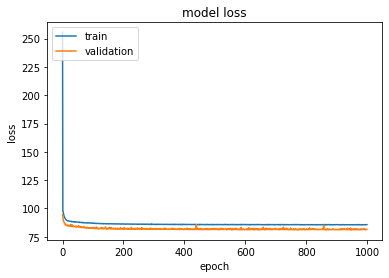

In [22]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [23]:
# from collections import defaultdict
# d = defaultdict(LabelEncoder)

# labeled_df = X_df.apply(lambda x: d[x.name].fit_transform(x))
# labeled_df
# labeled_df.apply(lambda x: d[x.name].inverse_transform(x))

In [24]:
test = np.expand_dims(X_test_scaled[0], axis=0)

In [25]:
print(f"Predicted price: {model.predict(test)}")

Predicted price: [[33.86278]]
